<a href="https://colab.research.google.com/github/baloochyb/TensorFlow/blob/main/supervised_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# linear regression

`After our imports and initialization, we enter a loop. Inside this loop, we calculate the overall loss (defined as the mean squared error over our dataset, y, of points). We then take the derivative of this loss with respect to our weights and bias. This produces values that we can use to adjust our weights and bias to lower the loss; this is known as gradient descent. By repeating this loop a number of times (technically called epochs), we can lower our loss to the point where it is as low as it can go, and we can use our trained model to make predictions.`


Initial loss: 52.321


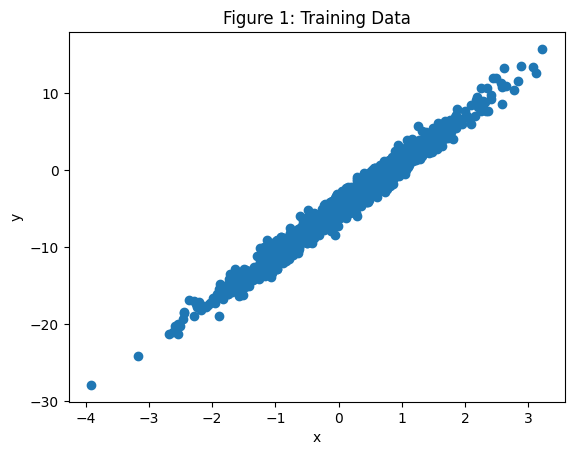

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

n_examples = 1000 # number of training examples
training_steps = 1000 # number of steps we are going to train for
display_step = 100 # after multiples of this, we display the loss
learning_rate = 0.01 # multiplying factor on gradients
m, c = 6, -5 # gradient and y-intercept of our line, edit these for a different linear problem

def train_data(n, m, c):
  x = tf.random.normal([n]) # n values taken from a normal distribution
  noise = tf.random.normal([n]) # n values taken from a normal distribution
  y = m*x + c + noise # our scatter plot
  return x, y
def prediction(x, weight, bias):
  return weight*x + bias # our predicted (learned) m and c, expression is like y = m*x + c
def loss(x, y, weights, biases):
  error = prediction(x, weights, biases) - y # how 'wrong' our predicted (learned) y is
  squared_error = tf.square(error)
  return tf.reduce_mean(input_tensor=squared_error) # overall mean of squared error, scalar value.
def grad(x, y, weights, biases):
  with tf.GradientTape() as tape:
    loss_ = loss(x, y, weights, biases)
  return tape.gradient(loss_, [weights, biases]) # direction and value of the gradient of our weights and biases

x, y = train_data(n_examples,m,c) # our training values x and y
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Figure 1: Training Data")
W = tf.Variable(np.random.randn()) # initial, random, value for predicted weight (m)
B = tf.Variable(np.random.randn()) # initial, random, value for predicted bias (c)
print("Initial loss: {:.3f}".format(loss(x, y, W, B)))


In [4]:
for step in range(training_steps): #iterate for each training step
  deltaW, deltaB = grad(x, y, W, B) # direction(sign) and value of the gradients of our loss with respect to our weights and bias
  change_W = deltaW * learning_rate # adjustment amount for weight
  change_B = deltaB * learning_rate # adjustment amount for bias
  W.assign_sub(change_W) # subract change_W from W
  B.assign_sub(change_B) # subract change_B from B
  if step==0 or step % display_step == 0:
    # print(deltaW.numpy(), deltaB.numpy()) # uncomment if you want to see the gradients
    print("Loss at step {:02d}: {:.6f}".format(step, loss(x, y, W, B)))


Loss at step 00: 50.279434
Loss at step 100: 1.808646
Loss at step 200: 0.962011
Loss at step 300: 0.947034
Loss at step 400: 0.946767
Loss at step 500: 0.946762
Loss at step 600: 0.946762
Loss at step 700: 0.946762
Loss at step 800: 0.946762
Loss at step 900: 0.946762


Final loss: 0.947
W = 6.0171918869018555, B = -4.952188491821289
Compared with m = 6.000, c = -5.000  of the original line


Text(0.5, 1.0, 'Figure 2: Line of Best Fit')

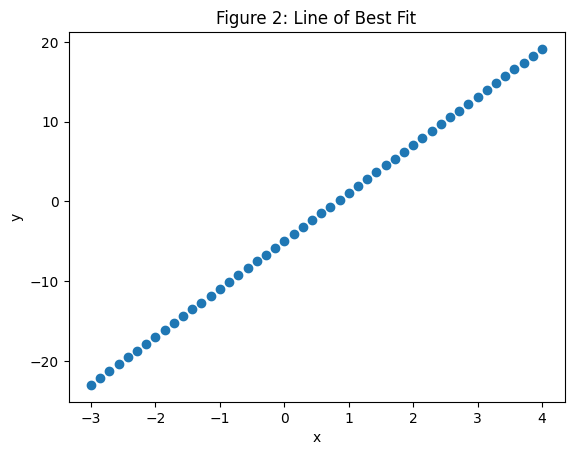

In [5]:
print("Final loss: {:.3f}".format(loss(x, y, W, B)))
print("W = {}, B = {}".format(W.numpy(), B.numpy()))
print("Compared with m = {:.3f}, c = {:.3f}".format(m, c)," of the original line")
xs = np.linspace(-3, 4, 50)
ys = W.numpy()*xs + B.numpy()
plt.scatter(xs,ys)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Figure 2: Line of Best Fit")

# The Boston housing dataset

In [9]:
import tensorflow as tf
from sklearn.datasets import load_boston
from sklearn.preprocessing import scale
import numpy as np

learning_rate = 0.01
epochs = 10000
display_epoch = epochs//20
n_train = 300
n_valid = 100

features, prices = load_boston(True)
n_test = len(features) - n_train - n_valid

# Keep n_train samples for training
train_features = tf.cast(scale(features[:n_train]), dtype=tf.float32)
train_prices = prices[:n_train]

# Keep n_valid samples for validation
valid_features = tf.cast(scale(features[n_train:n_train+n_valid]), dtype=tf.float32)
valid_prices = prices[n_train:n_train+n_valid]

# Keep remaining n_test data points as test set)
test_features = tf.cast(scale(features[n_train+n_valid:n_train+n_valid+n_test]), dtype=tf.float32)
test_prices = prices[n_train + n_valid : n_train + n_valid + n_test]

# A loss function using root mean-squared error
def loss(x, y, weights, bias):
  error = prediction(x, weights, bias) - y # how 'wrong' our predicted (learned) y is
  squared_error = tf.square(error)
  return tf.sqrt(tf.reduce_mean(input_tensor=squared_error)) # squre root of overall mean of squared error.
# Find the derivative of loss with respect to weight and bias
def gradient(x, y, weights, bias):
  with tf.GradientTape() as tape:
    loss_value = loss(x, y, weights, bias)
  return tape.gradient(loss_value, [weights, bias])# direction and value of the gradient of our weight and bias

# Start with random values for W and B on the same batch of data
W = tf.Variable(tf.random.normal([13, 1], mean=0.0, stddev=1.0, dtype=tf.float32))
B = tf.Variable(tf.zeros(1) , dtype = tf.float32)
print(W, B)
print("Initial loss: {:.3f}".format(loss(train_features, train_prices, W, B)))

for e in range(epochs): #iterate for each training epoch
  deltaW, deltaB = gradient(train_features, train_prices, W, B) # direction (sign) and value of the gradient of our weight and bias
  change_W = deltaW * learning_rate # adjustment amount for weight
  change_B = deltaB * learning_rate # adjustment amount for bias
  W.assign_sub(change_W) # subract from W
  B.assign_sub(change_B) # subract from B
  if e==0 or e % display_epoch == 0:
    # print(deltaW.numpy(), deltaB.numpy()) # uncomment if you want to see the gradients
    print("Validation loss after epoch {:02d}: {:.3f}".format(e, loss(valid_features, valid_prices, W, B)))

example_house = 69
y = test_prices[example_house]
y_pred = prediction(test_features,W.numpy(),B.numpy())[example_house]
print("Actual median house value",y," in $10K")
print("Predicted median house value ",y_pred.numpy()," in $10K")

ImportError: ignored